In [85]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests 
from bs4 import BeautifulSoup
from tqdm import tqdm
#import FILL_IN_THE_BLANK

In [3]:
movies = pd.read_csv('./movies.csv')
ratings = pd.read_csv('./ratings.csv') 
links = pd.read_csv('./links.csv')
tags = pd.read_csv('./tags.csv')

#### Q1. What is the shape of "movies.csv"?
#### 4 csv

#### Q2. What is the shape of "ratings.csv"?

In [5]:
movies.shape

(9742, 3)

#### Q3. How many unique "userId" are available in "ratings.csv"

In [6]:
ratings.shape

(100836, 4)

#### Q4. Which movie has recieved maximum number of user ratings?

In [7]:
ratings['userId'].nunique()

610

#### Q5. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [8]:
movie_ratings = pd.merge(movies, ratings, on='movieId', how='inner')
movie_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [9]:
movie_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [10]:
movie_ratings_groupby = movie_ratings.groupby('title')['userId'].nunique().reset_index()
movie_ratings_groupby

,title,userId
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [11]:
movie_ratings_groupby[movie_ratings_groupby['userId'] == movie_ratings_groupby['userId'].max()].title
#Forrest Gump (1994)

3158    Forrest Gump (1994)
Name: title, dtype: object

In [12]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### Q6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [13]:
movie_tags = pd.merge(movies, tags, on='movieId', how='inner')
movie_tags

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [14]:
movie_names = list(movie_tags.title.unique())

In [15]:
for i in movie_names:
    if 'matrix' in i.lower():
        print(i)

Matrix, The (1999)
Animatrix, The (2003)


In [16]:
movie_tags[movie_tags['title'] == 'Matrix, The (1999)']['tag']

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

In [17]:
#alternate universe
#philosophy
#post apocalyptic

#### Q.7)What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [18]:
for i in movie_names:
    if 'terminator' in i.lower():
        print(i)

Terminator 2: Judgment Day (1991)
Terminator, The (1984)
Terminator Salvation (2009)


In [19]:
terminator_2_ratings = list(movie_ratings[movie_ratings.title=='Terminator 2: Judgment Day (1991)']['rating'])



In [20]:
print(f'avg rating of Terminator 2: Judgment Day (1991) is {sum(terminator_2_ratings)/len(terminator_2_ratings)}')

avg rating of Terminator 2: Judgment Day (1991) is 3.970982142857143


#### Q.8)How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [21]:
for i in movie_names:
    if 'fight' in i.lower():
        print(i)

X-Files: Fight the Future, The (1998)
Fight Club (1999)
Dogfight (1991)
Why We Fight (2005)


In [22]:
fight_club_ratings = list(movie_ratings[movie_ratings.title=='Fight Club (1999)']['rating'])

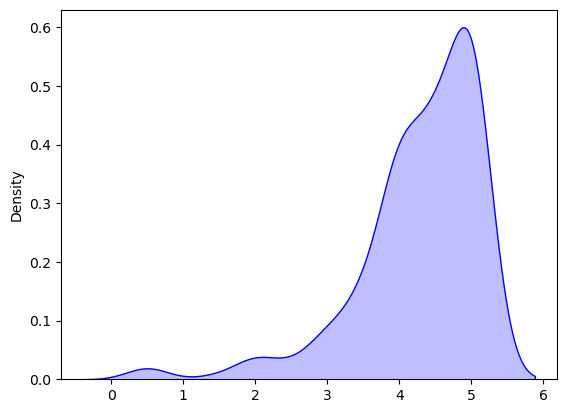

In [23]:
sns.kdeplot(fight_club_ratings, shade=True, color='blue')
plt.show()

In [24]:
#left skewed distribution

In [25]:
#important note 1
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId','user_rating_count','user_rating_mean']
grouped_movie_ratings = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
grouped_movie_ratings_50 = grouped_movie_ratings[grouped_movie_ratings['user_rating_count']>50]

#### Q.9) Which movie is the most popular based on  average user ratings?

In [26]:
max_movie_rating = grouped_movie_ratings_50.user_rating_mean.max()
grouped_movie_ratings_50[grouped_movie_ratings_50['user_rating_mean']==max_movie_rating].title

277    Shawshank Redemption, The (1994)
Name: title, dtype: object

#### Q.10) Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [27]:
for i in sorted(grouped_movie_ratings_50.user_rating_count)[-5:]:
    print(grouped_movie_ratings_50[grouped_movie_ratings_50['user_rating_count']==i]['title'])

1938    Matrix, The (1999)
Name: title, dtype: object
510    Silence of the Lambs, The (1991)
Name: title, dtype: object
257    Pulp Fiction (1994)
Name: title, dtype: object
277    Shawshank Redemption, The (1994)
Name: title, dtype: object
314    Forrest Gump (1994)
Name: title, dtype: object


In [28]:
#Matrix, The (1999)
#Silence of the Lambs, The (1991)
#Pulp Fiction (1994)

#### Q.11) Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [29]:
rows = list()
for i in range(len(grouped_movie_ratings_50)):
    if 'Sci-Fi' in grouped_movie_ratings_50.iloc[i]['genres']:
        rows.append(i)
grouped_movie_ratings_50_sci_fi = grouped_movie_ratings_50.iloc[rows].reset_index(drop=True)


In [30]:
grouped_movie_ratings_50_sci_fi.sort_values(by='user_rating_count', ascending=False).reset_index(drop=True).iloc[2].title

'Jurassic Park (1993)'

In [31]:
#important note 2
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [32]:
grouped_movie_ratings_50_links = pd.merge(grouped_movie_ratings_50, links, on='movieId', how='inner')

In [33]:
grouped_movie_ratings_50_links

,movieId,title,genres,user_rating_count,user_rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [86]:
dummy = dict()
for imdbId in tqdm(list(grouped_movie_ratings_50_links.imdbId)):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                          'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        script_tag = soup.find('script', type='application/ld+json')
        script_content = script_tag.contents[0]
        dummy[imdbId] = json.loads(script_content)['aggregateRating']['ratingValue']
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

100%|█████████████████████████████████████████| 436/436 [11:46<00:00,  1.62s/it]


In [101]:
imbd_rating = dict()
imbd_rating['imdbId'] = list()
imbd_rating['imdbrating'] = list()
for key,values in dummy.items():
    imbd_rating['imdbId'].append(key)
    imbd_rating['imdbrating'].append(values)

In [104]:
imbd_rating_df = pd.DataFrame(imbd_rating)

In [106]:
grouped_movie_ratings_50_links =  pd.merge(grouped_movie_ratings_50_links, imbd_rating_df, on='imdbId', how='inner')

In [107]:
grouped_movie_ratings_50_links

,movieId,title,genres,user_rating_count,user_rating_mean,imdbId,tmdbId,imdbrating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


#### Q.12) Mention the movieId of the movie which has the highest IMDB rating.

In [129]:
grouped_movie_ratings_50_links.loc[grouped_movie_ratings_50_links['imdbrating'].idxmax(), 'movieId']

318

#### Q.13) Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [115]:
rows = list()
for i in range(len(grouped_movie_ratings_50_links)):
    if 'Sci-Fi' in grouped_movie_ratings_50_links.iloc[i]['genres']:
        rows.append(i)
grouped_movie_ratings_50_links_sci_fi = grouped_movie_ratings_50_links.iloc[rows].reset_index(drop=True)

In [130]:
grouped_movie_ratings_50_links_sci_fi.loc[grouped_movie_ratings_50_links_sci_fi['imdbrating'].idxmax(), 'movieId']

79132